# <center> Entender o Problema

-- Objetivo do Problema:
    -- 1.0 Previsão do primeiro destino que um novo usuário irá escolher.
    
    -- Por que?
        -- Qual tipo de modelo de negócio do Airbnb?
        --(MarketPlace - Conecta Pessoas que Oferecem Acomodaões que estão procurando Acomodação)
            -- Tamanho do Portfólio
            -- Diversidade/Densidade de Portfólio
            -- Preço Médio
        -- Demanda (Procura de Acomodações)
            -- Número de Usuários
            -- LTV (Lifetime Value)
            -- CAC (Client Acquisition Cost - Propaganda Instagram/Youtube)
            
        --  Revenue ( O que o AirBnb quer )
            Gross Revenue = Fee*Número Cliente - CAC (Margens de Contribuição)
            
            
-- Proposta da Solução
    -- Modelo de Previsão do primeiro destino de um novo usário
    -- 1.0 Predições e salva em Tabela do Banco de Dados.
    -- 2.0 API:
        
        --- Input: Usuário e sua Características
        --- Output: Usuário e suas características com a **predição do destino**
            

***MultiClasse e Desbalanceado

# 0.0 Imports

In [1]:
import random
import pandas as pd

from keras      import models          as ml
from keras      import layers          as l
from sklearn    import model_selection as ms
from sklearn    import preprocessing   as pp
from sklearn    import metrics         as m
from scikitplot import metrics         as mt

## 0.1 Helper Funtions

## 0.2 Loanding Data

In [2]:
df_raw = pd.read_csv ('training_users.csv', low_memory = True)
df_raw.shape

(213451, 16)

In [3]:
#df_sessions = pd.read_csv ('sessions.csv', low_memory = True)
#df_sessions.shape

# 1.0 Data Description

In [4]:
df1 = df_raw.copy()

In [5]:
print('Number of Rows: {}.'.format(df1.shape[0]))
print('Number of Columns: {}.'.format(df1.shape[1]))

Number of Rows: 213451.
Number of Columns: 16.


## 1.1 Date Type

In [6]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.2 NA Check

In [7]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [8]:
#remove missing value completly

df1 = df1.dropna()

## 1.3 Change Data Type

In [9]:
# date_account_created
df1['date_account_created'] = pd.to_datetime (df1['date_account_created'])

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime (df1['timestamp_first_active'], format = '%Y%m%d%H%M%S')

# date_first_booking
df1['date_first_booking'] = pd.to_datetime (df1['date_first_booking'])

# age
df1['age'] = df1['age'].astype(int)

## 1.4 Check Balanced Data

In [10]:
df1['country_destination'].value_counts(normalize = True) #percent

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0 Data Filtering

In [11]:
df2 = df1. copy()

## 2.1 Columns Filtering Rows

# 3.0 Data Preparation

In [12]:
df3 = df2. copy()

In [13]:
# dummy variable
df3_dummy = pd.get_dummies (df3.drop (['id', 'country_destination'], axis = 1 ))

#join id and country destination
df3 = pd.concat ([df3[['id', 'country_destination']], df3_dummy], axis = 1)

# 4.0 Feature Selection

In [14]:
#Exclusão de Features que não são relevantes para a construção do Modelo

cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']

df4 = df3.drop (cols_drop, axis = 1)

In [15]:
X = df4.drop ('country_destination', axis = 1)
y = df4['country_destination'].copy()

In [16]:
#Split DataSet into Training and Test

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state = 32)

# 5.0 Machine Learning Model - Neural Network MLP (Validação)

In [17]:
x_train = X_train.drop ('id', axis = 1)
x_test = X_test.drop ('id', axis = 1)

## 5.1 Baseline Model

In [31]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
country_destination_weights = df1['country_destination'].value_counts(normalize = True).sort_index().tolist()

#Modelo Entrega Valor Aleatório
yhat_random = random.choices (population = country_destination_list, 
                              k = k_num,
                              weights = country_destination_weights )
len (yhat_random)

13635

Accuracy: 0.7027502750275028
Balanced Accuracy:0.08816332171186365
Kappa Score: -0.0059268279059374596
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       214
          DE       0.01      0.01      0.01       170
          ES       0.02      0.01      0.02       345
          FR       0.04      0.05      0.05       710
          GB       0.02      0.03      0.03       344
          IT       0.02      0.02      0.02       423
          NL       0.03      0.03      0.03       128
          PT       0.00      0.00      0.00        36
          US       0.70      0.71      0.71      9624
       other       0.11      0.11      0.11      1540

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.51      0.52      0.51     13635



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

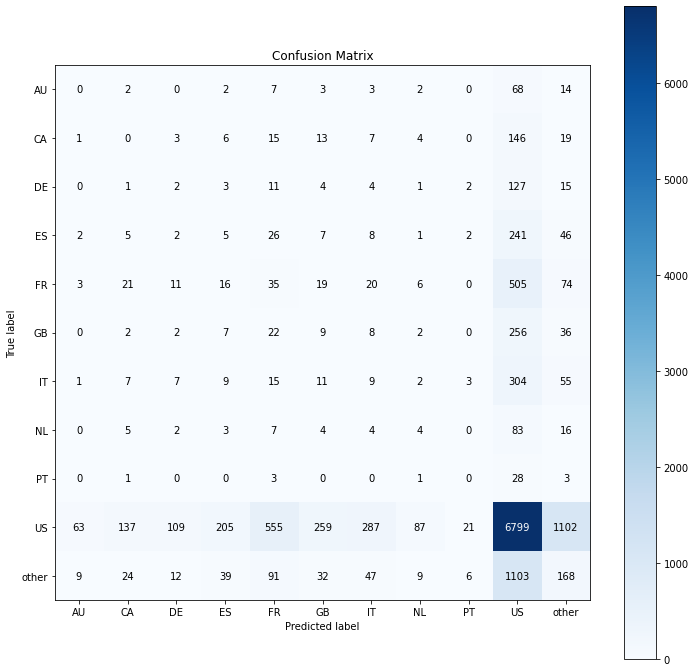

In [32]:
# Accuracy 
acc_random = m.accuracy_score (y_test_nn, yhat_nn)
print( 'Accuracy: {}'.format (acc_random))

#Balanced Accuracy

balanced_acc_random = m.balanced_accuracy_score (y_test_nn, yhat_random)
print ('Balanced Accuracy:{}'.format (balanced_acc_random))

#Kappa Metrics
kappa_random = m.cohen_kappa_score(y_test_nn, yhat_random)
print ('Kappa Score: {}'.format (kappa_random))

#classification report
print (m.classification_report (y_test_nn, yhat_random))

#Confusion Matrix
mt.plot_confusion_matrix (y_test_nn, yhat_random, normalize = False, figsize = (12,12))

## 5.2 Neural Network - MLP

In [23]:
ohe = pp.OneHotEncoder ()
y_train_nn = ohe.fit_transform (y_train.values.reshape (-1,1)).toarray()

In [25]:
#model definition
model = ml.Sequential()
model.add (l.Dense(128, input_dim = x_train.shape[1], activation = 'relu'))
model.add (l.Dense(11, activation = 'softmax'))

#model compile
model.compile ( loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#train model
model.fit (x_train, y_train_nn, epochs = 100)

Epoch 1/100
1705/1705 [==============================] - 5s 2ms/step - loss: 1.4083 - accuracy: 0.6969
Epoch 2/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.2635 - accuracy: 0.7075
Epoch 3/100
1705/1705 [==============================] - 4s 3ms/step - loss: 1.2469 - accuracy: 0.7079
Epoch 4/100
1705/1705 [==============================] - 8s 5ms/step - loss: 1.2143 - accuracy: 0.7085
Epoch 5/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.1938 - accuracy: 0.7085
Epoch 6/100
1705/1705 [==============================] - 6s 4ms/step - loss: 1.1786 - accuracy: 0.7086
Epoch 7/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.1664 - accuracy: 0.7086
Epoch 8/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.1512 - accuracy: 0.7088
Epoch 9/100
1705/1705 [==============================] - 7s 4ms/step - loss: 1.1468 - accuracy: 0.7087
Epoch 10/100
1705/1705 [==============================] - 7s 4ms/step - l

In [26]:
#predicition
pred_nn = model.predict (x_test)

#invert prediction
yhat_nn = ohe.inverse_transform (pred_nn)

#prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape (1, -1)[0]

## 5.2 Neural Network - CV

In [ ]:
#generate k-fold

num_folds = 5
kfold = StratifiedKFold (n_splits = num_folds, shuffle = True, random_state = 32)

for train_ix, val_ix in kfols.split (x_train, y_train):
    
    #get fold
    x_train.iloc[train_ix]
    
    
    
    #model definition
    model = ml.Sequential()
    model.add (l.Dense(256, input_dim = x_train.shape[1], activation = 'relu'))
    model.add (l.Dense(11, activation = 'softmax'))

    #model compile
    model.compile ( loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    
    #train model
    model.fit (x_train, y_train_nn, epochs = 100, batch_size = 32, verbose = 0)